In [1]:
#import libraries

import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

import pickle

from sklearn.decomposition import PCA

In [25]:
X = pd.read_csv('CSV_files/training_set_values.csv', index_col = 0)
y = pd.read_csv('CSV_files/training_set_labels.csv', index_col = 0)

df = pd.concat([X, y], axis = 1)

In [26]:
df = df[df['construction_year'] > 0]

In [27]:
features = ['amount_tsh', 'gps_height', 'population', 'construction_year']

In [28]:
X_pca = df[features].values
y_pca = df['status_group'].values

In [29]:
df[features].cov()

,amount_tsh,gps_height,population,construction_year
amount_tsh,1.253894e+07,83489.559873,-8607.495425,279.616357
gps_height,8.348956e+04,382021.241203,-20734.495626,-48.129986
population,-8.607495e+03,-20734.495626,305083.614098,224.188014
construction_year,2.796164e+02,-48.129986,224.188014,155.551907


In [30]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler

X_pca = StandardScaler().fit_transform(X_pca)

In [31]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2',
                                      'principal component 3', 'principal component 4'])

In [33]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,-1.046799,1.203468,0.579682,-0.265899
1,-0.067826,0.766131,-0.939207,0.271142
2,0.625104,0.440559,-0.605778,-0.530652
3,0.338857,-1.040111,0.667053,-0.840062
4,1.066356,0.062472,-0.479253,-1.570586
...,...,...,...,...
38686,-0.207606,-1.873193,1.657981,-0.050865
38687,0.707401,0.218160,-0.379816,-1.092041
38688,-0.292415,0.035182,-0.371797,0.062618
38689,-0.868052,0.710823,0.554680,-0.363453


In [10]:
pca.explained_variance_ratio_

array([0.26999786, 0.25443441, 0.24368456, 0.23188318])

In [11]:
pca.explained_variance_

array([1.08001935, 1.01776393, 0.97476343, 0.92755668])

In [34]:
pca.components_

PCA()

In [12]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[1.08001935 1.01776393 0.97476343 0.92755668]
[[-0.32304204 -0.65162255  0.62652073  0.28018505]
 [ 0.65630165  0.22703118  0.27767018  0.66379535]
 [ 0.61239116 -0.25551907  0.34651443 -0.66303456]
 [-0.29981504  0.67716682  0.6405457  -0.2031188 ]]


In [16]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]

In [18]:
# get the loadings

structure_loading_1 = pc1 * np.sqrt(eig_values)
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1

array([[-0.33571814, -0.65738476,  0.6185646 ,  0.2698455 ],
       [ 0.68205479,  0.22903878,  0.27414407,  0.6392996 ],
       [ 0.63642126, -0.25777859,  0.34211407, -0.63856689],
       [-0.31157972,  0.68315491,  0.63241146, -0.1956232 ]])

In [21]:
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=features)
str_loading_2.sort_values(ascending = False)

construction_year    0.669665
amount_tsh           0.662105
population           0.280126
gps_height           0.229039
dtype: float64

In [22]:
structure_loading_3 = pc3* np.sqrt(eig_values[2])
str_loading_3 = pd.Series(structure_loading_3, index=features)
str_loading_3.sort_values(ascending = False)

amount_tsh           0.604614
population           0.342114
gps_height          -0.252274
construction_year   -0.654615
dtype: float64

In [23]:
structure_loading_4 = pc4* np.sqrt(eig_values[3])
str_loading_4 = pd.Series(structure_loading_4, index=features)
str_loading_4.sort_values(ascending = False)

gps_height           0.652178
population           0.616908
construction_year   -0.195623
amount_tsh          -0.288751
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

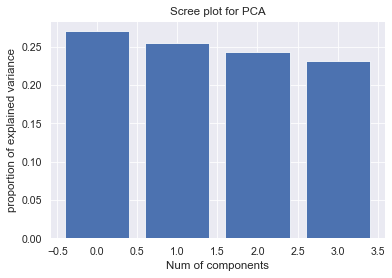

In [18]:
index = np.arange(4)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'explained variance ratio')

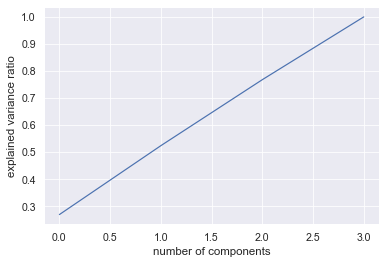

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')

# Attempting MCA

In [ ]:
import mca
from pipeline_functions import pipeline_df

In [ ]:
df = pipeline_df(df)

In [ ]:
df.drop(columns = ['amount_tsh', 'gps_height', 'management', 'source_class_surface',
       'source_class_unknown', 'source_type_dam', 'source_type_other',
       'source_type_rainwater harvesting', 'source_type_river/lake',
       'source_type_shallow well', 'source_type_spring', 'basin__Lake Nyasa',
       'basin__Lake Rukwa', 'basin__Lake Tanganyika', 'basin__Lake Victoria',
       'basin__Pangani', 'basin__Rufiji', 'basin__Ruvuma / Southern Coast',
       'basin__Wami / Ruvu', 'region__Dar es Salaam', 'region__Dodoma',
       'region__Iringa', 'region__Kagera', 'region__Kigoma',
       'region__Kilimanjaro', 'region__Lindi', 'region__Manyara',
       'region__Mara', 'region__Mbeya', 'region__Morogoro', 'region__Mtwara',
       'region__Mwanza', 'region__Pwani', 'region__Rukwa', 'region__Ruvuma',
       'region__Shinyanga', 'region__Singida', 'region__Tabora',
       'region__Tanga', 'extraction__handpump', 'extraction__motorpump',
       'extraction__other', 'extraction__rope pump', 'extraction__submersible',
       'extraction__wind-powered', 'quality__fluoride', 'quality__good', 'quality__milky',
       'quality__salty', 'quality__unknown', 'quantity__enough',
       'quantity__insufficient', 'quantity__seasonal', 'quantity__unknown',
       'funder_Hesawa', 'funder_Danida', 'funder_Government Of Tanzania',
       'installer_DWE', 'installer_Government', 'subvillage_Madukani',
       'subvillage_Shuleni', 'subvillage_Majengo', 'district_1', 'district_2',
       'district_3', 'district_4', 'lga_Njombe', 'lga_Arusha Rural',
       'lga_Moshi Rural', 'lga_Bariadi', 'lga_Rungwe', 'lga_Kilosa',
       'lga_Kasulu', 'lga_Mbozi', 'lga_Meru', 'lga_Bagamoyo', 'payment__other', 
       'payment__pay annually', 'payment__pay monthly', 'payment__pay per bucket', 
       'payment__pay when scheme fails', 'payment__unknown', 'waterpoint_type__communal standpipe',
       'waterpoint_type__dam', 'waterpoint_type__hand pump',
       'waterpoint_type__improved spring', 'waterpoint_type__other',], inplace = True)

In [ ]:
feature = df.drop(columns = 'status_group').columns

In [ ]:
feature

In [ ]:
mca_df = mca.MCA(df)